In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
survey = pd.read_csv('../../../testing/data/survey.csv')

In [3]:
import cleaner as cl
data = cl.extract_columns_by_name(survey, ['Zeitstempel', 'Geschlecht'])
data = cl.set_index_column_by_name(data, 'Zeitstempel')
data = cl.drop_time_component(data, 'index')
data

/Users/theresagschweidl/Documents/GitHub/BA2024/src/backend/data_processor/cleaner.py:17: UserWarning: Parsing dates in %d.%m.%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data.index = pd.to_datetime(data.index)


,Geschlecht
Zeitstempel,
2021-03-18 15:06:12,Weiblich
2021-03-18 15:14:14,Weiblich
2021-03-18 16:33:16,Männlich
2021-03-18 21:22:46,Weiblich
2021-03-22 08:08:23,Männlich
...,...
2021-04-25 00:01:16,Weiblich
2021-04-26 11:24:09,Männlich
2021-04-29 18:12:29,Weiblich


In [46]:
timeline_data = survey[['Zeitstempel', 'Geschlecht']]
timeline_data['Zeitstempel'] = pd.to_datetime(timeline_data['Zeitstempel'], dayfirst=True)
#timeline_data.loc[:, 'Zeitstempel']= pd.to_datetime(timeline_data['Zeitstempel'], dayfirst=True)
timeline_data.loc[:, 'Zeitstempel']= timeline_data['Zeitstempel'].dt.date
timeline_data

/var/folders/07/kk_6pdl10ts50nj7vkhk22040000gn/T/ipykernel_33313/800889107.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  timeline_data['Zeitstempel'] = pd.to_datetime(timeline_data['Zeitstempel'], dayfirst=True)


,Zeitstempel,Geschlecht
0,2021-03-18,Weiblich
1,2021-03-18,Weiblich
2,2021-03-18,Männlich
3,2021-03-18,Weiblich
4,2021-03-22,Männlich
...,...,...
913,2021-04-25,Weiblich
914,2021-04-26,Männlich
915,2021-04-29,Weiblich
916,2021-06-01,Weiblich


In [51]:
pivot_df = timeline_data.pivot_table(index='Zeitstempel', columns='Geschlecht', aggfunc=len, fill_value=0)
pivot_df['Total'] = pivot_df['Männlich'] + pivot_df['Sonstiges'] + pivot_df['Weiblich']
pivot_df

Geschlecht,Männlich,Sonstiges,Weiblich,Total
Zeitstempel,,,,
2021-03-18,1,0,3,4
2021-03-22,4,0,0,4
2021-03-23,11,1,7,19
2021-03-24,1,0,1,2
2021-03-25,1,0,0,1
2021-03-26,110,1,145,256
2021-03-27,12,1,35,48
2021-03-28,7,0,6,13
2021-03-29,3,0,4,7


(array([18701., 18718., 18732., 18748., 18762., 18779.]),
 [Text(18701.0, 0, '2021-03-15'),
  Text(18718.0, 0, '2021-04-01'),
  Text(18732.0, 0, '2021-04-15'),
  Text(18748.0, 0, '2021-05-01'),
  Text(18762.0, 0, '2021-05-15'),
  Text(18779.0, 0, '2021-06-01')])

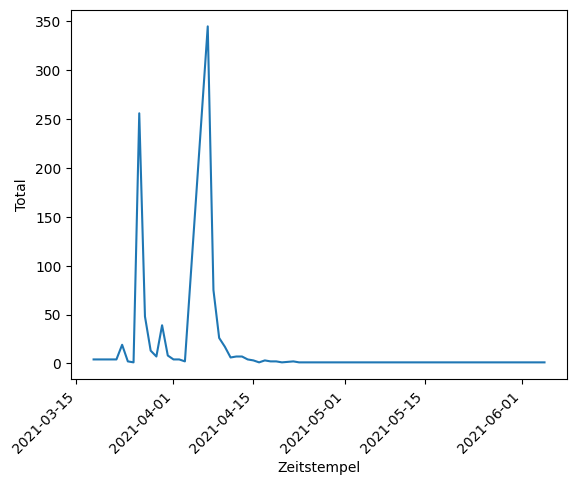

In [63]:
sns.lineplot(pivot_df, x='Zeitstempel', y='Total')
plt.xticks(rotation=45, ha='right')